In [3]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.0 MB/s eta 0:02:23
   ---------------------------------------- 0.8/150.0 MB 932.9 kB/s eta 0:02:40
   ---------------------------------------- 0.8/150.0 MB 932.9 kB/s eta 0:02:40
   ---------------------------------------- 1.0/150.0 MB 882.6 kB/s eta 0:02:49
   ---------------------------------------- 1.0/150.0 MB 882.6 kB/s eta 0:02:49
   ---------------------------------------- 1.3/150.0 MB 818.6 kB/s eta 0:03:02
   ---------------------------------------- 1.6/150.0 MB 883.2 kB/s eta 0:02:49
   ---------------------------------------- 1.8/150.0 MB 923.6 kB/s eta 0:02:41
    --------------------------------------- 2.6/150.0 MB 1.1 MB/s eta 0:02:14


In [10]:
# === IMPORTS ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# import shap
import warnings
warnings.filterwarnings("ignore")


In [11]:
df = pd.read_csv("MachineLearningRating_v3.txt", delimiter="|")
df.columns = df.columns.str.strip().str.lower()

# Filter claims > 0 for severity modeling
df = df[df["totalclaims"] > 0]

# Create additional features
df['margin'] = df['totalpremium'] - df['totalclaims']
df['claim_occurred'] = df['totalclaims'].apply(lambda x: 1)

# Select features (adjust based on availability)
features = ['registrationyear', 'cubiccapacity', 'kilowatts',
            'numberofdoors', 'suminsured', 'calculatedpremiumperterm',
            'customvalueestimate']

# Drop missing rows
df = df.dropna(subset=features + ['totalclaims'])

X = df[features]
y = df['totalclaims']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [13]:
def evaluate(y_true, y_pred, name):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:\n  RMSE: {rmse:.2f}\n  R²: {r2:.2f}\n")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")
evaluate(y_test, y_pred_xgb, "XGBoost")


Linear Regression:
  RMSE: 42813.28
  R²: 0.22

Random Forest:
  RMSE: 45365.39
  R²: 0.13

XGBoost:
  RMSE: 52804.42
  R²: -0.18



In [9]:
pip install shap

   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


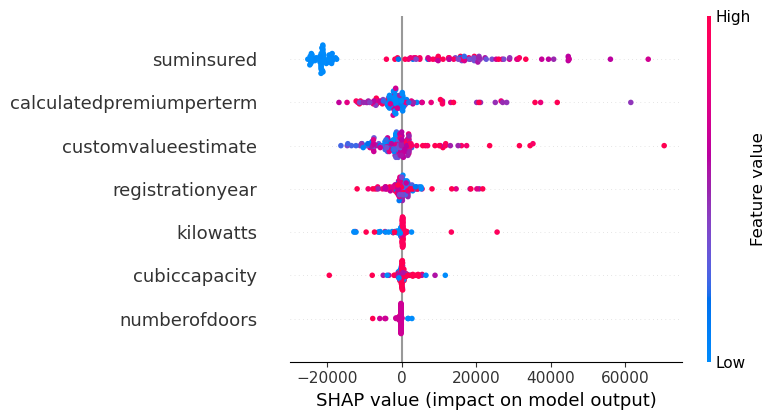

In [14]:
import shap

explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)
